# Testing the difference between a Binomial/Poisson distribution and a Gaussian distribution as you change the parameters of the Binomial/Poisson using: 
    
    1) KS
    
    2) AD
    
    3) KL
    
    4) Pearson's chisq (not done in this example)

In [1]:
from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

#plus importing scipy.stats
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


# AD and KS test

I need to figure out what each test function returns. Let me run them once testing an obvious result: is a Gaussian Gaussian? I know the answer so this is a reality check to make sure I understand the output of the functions (and read the manual at the same time!)

I am testing a normal distribution (Gaussian, mean = 0, std = 1) against a Gaussian model, and a Poisson with small $lambda$, or a binomial _w small np against a Gaussian model_. I expect to find that in the first case the Gaussian is, well, Gaussian and in the second case that the binomial with small np is NOT Gaussian

In [2]:
np.random.seed(999)
dist_n = np.random.randn(1000) 

#test ad and ks. those are easy
print ("normal on normal", scipy.stats.kstest(dist_n,'norm'))
print ("normal on normal", scipy.stats.anderson(dist_n, dist='norm'))

normal on normal KstestResult(statistic=0.016344431331899001, pvalue=0.95212890203293565)
normal on normal AndersonResult(statistic=0.26231814126674635, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


# $H_0$: The generated sample Gaussian distribution comes from a Gaussian distribution.

## KS Test:
A high p-value of 0.95 ($p-value > 0.05$) means that the sample comes from a Gaussian distribution and the $H_0$ cannot be rejected.

## AD Test:
At $\alpha=0.05$, the statistics = 0.26 is smaller than the 0.784 critical value for $\alpha=0.05$ so the $H_0$ cannot be rejected. It means that the sample comes from a Gaussian distribution.

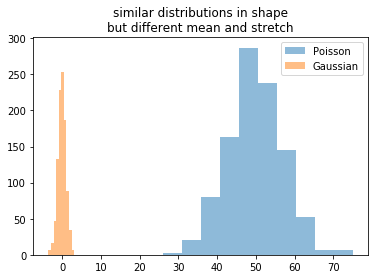

poisson on normal KstestResult(statistic=1.0, pvalue=0.0)
poisson on normal AndersonResult(statistic=1.0615401174379713, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


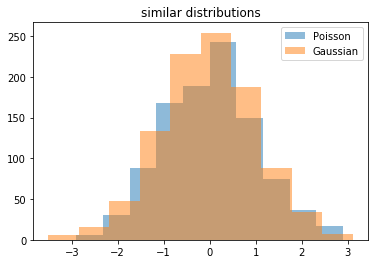

poisson vs normal KstestResult(statistic=0.031537538725986858, pvalue=0.26790785395584682)
poisson vs normal AndersonResult(statistic=0.91972299371070676, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [3]:
np.random.seed(999)

dist_p = np.random.poisson(50, 1000)
pl.figure()
pl.hist(dist_p, alpha=0.5, label="Poisson")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions in shape\nbut different mean and stretch")
pl.show()
print ("poisson on normal", scipy.stats.kstest(dist_p,'norm'))
print ("poisson on normal", scipy.stats.anderson(dist_p, dist='norm'))

dist_p = (np.random.poisson(100, 1000) - 100) * 0.1 #-100 fixes mean, *0.1 fixes stdev
pl.figure()
pl.hist(dist_p, alpha=0.5, label="Poisson")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions")
pl.show()

print ("poisson vs normal", scipy.stats.kstest(dist_p,'norm'))
print ("poisson vs normal", scipy.stats.anderson(dist_p, dist='norm'))

#### Figure 1. Histogram of a Gaussian distribution $N(0,1)$ and histogram of a Poisson distribution with $\lambda = 50$

#### Figure 2. Overlay of the Gaussian distribution $N(0,1)$ and the Poisson distribution transformed to have $\mu = 0$.

# $H_0$: The generated sample Poisson distrubution ($\lambda = 50$) comes from a Gaussian distribution.

## KS Test:
The p-value returned is quite high (0.26) which is higher than our significance level of 0.05 which means we cannot reject the $H_0$ that the sample Poisson distribution comes a from a Gaussian distribution.

## AD Test:
The AD statistic (0.91) is higher than the critical value at 5% (0.784) which means that we can reject our $H_0$ that the sample Poisson distribution comes from a Gaussian distribution.

## Analysis:
I find it strange that the two tests come up with different results for rejecting the $H_0$ and we can't really make a conclusion if this Poisson distribution with a mean of 50 really does come from a Gaussian distribution.

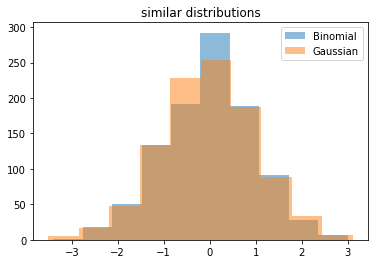

binomial vs normal KstestResult(statistic=0.057144601416603324, pvalue=0.0027967733659284288)
binomial vs normal AndersonResult(statistic=2.3205278765747153, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [4]:
p = 0.5
n = 100

np.random.seed(999)
dist_b = (np.random.binomial(n, p, 1000) - n*p) / np.sqrt(n*p*(1-p))  #subtract mean divide by stdev
pl.figure()
pl.hist(dist_b, alpha=0.5, label="Binomial")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions")
pl.show()

print ("binomial vs normal", scipy.stats.kstest(dist_b,'norm'))
print ("binomial vs normal", scipy.stats.anderson(dist_b, dist='norm'))

#### Figure 3. Overlay of the Gaussian distribution $N(0,1)$ and the Binomial distribution with initial $\mu = 50$ transformed to have $\mu = 0$.

# $H_0$: The generate sample Binomial distribution comes from the Gaussian distribution.

## KS Test:
The p-value is 0.002 which is smaller than the $\alpha$ of 0.05 so it means we can reject the $H_0$ that the Binomial distribution comes from a Gaussian distribution.

## AD Test: 
The statistic 2.32 is greater than 0.784 so it means we can also rejct the $H_0$ that this Binomial distribution comes from a Gaussian distribution.

## Analysis:
With these two tests, we can more or less conclude that this sample Binomial distribution with a mean of 50 ($np = 100 * 0.5$) does not come from a Gaussian distribution.

# KL DIVERGENCE

The KL divergence is a little trickier: 

__ empirical distribution__ 
it wants to know the distribution _y_ value at a location _x_.  have to pass it the values of the _distribution_ at some x's, not my histogram though, so I need a  **NORMALIZED HOSTOGRAM OF MY DISTRIBUTION**, i.e. derive a probability distribution function (PDF) from the data. 

__model__
Then I have to pass it a function for my comparison distribution evaluated at the same _x_-values where my empirical distribution is evaluated (not just the name of a distribution like for KS and AD)

In [20]:
# np.histogram returns the value of the histogram (y) and the edges of the bins (x). 
# Notice: the edges, not the centers
distpdf_n, mybins_n, = np.histogram(dist_n, density=True)
distpdf_b, mybins_b, = np.histogram(dist_b, density=True)
distpdf_p, mybins_p, = np.histogram(dist_p, density=True)

#notice the extra comma on the left side of the '=' sign: 
#that tells numpy take the first two values returned, 
#and throw away the rest

then i have to pass it the functional form of a normal PDF, which is returned by the function scipy.stats.norm for example (a google search would have told you!) 
evaluated at the bin centers of the histogram from before

In [36]:
#get the bin centers
bincenters_n = mybins_n[:-1] + 0.5*(mybins_n[1] - mybins_n[0])
bincenters_b = mybins_b[:-1] + 0.5*(mybins_b[1] - mybins_b[0])
bincenters_p = mybins_p[:-1] + 0.5*(mybins_p[1] - mybins_p[0])

print ('the KL test returns the "entropy". ' + 
       "To figure out what the number means thoug in terms of NULL rejection, help yourself " + 
       "with the fact that you know what the result should be for these three distributions!")
print ("normal on normal", 
    scipy.stats.entropy(distpdf_n, 
                            scipy.stats.norm.pdf(bincenters_n)) )
print ("poisson on normal", 
       scipy.stats.entropy(distpdf_p, 
                                scipy.stats.norm.pdf(bincenters_p)))

print ("binomial on normal", 
       scipy.stats.entropy(distpdf_b, 
                                scipy.stats.norm.pdf(bincenters_b)))

#you can interpret this as a distance: 
# it increases as the distributions diverge

the KL test returns the "entropy". To figure out what the number means thoug in terms of NULL rejection, help yourself with the fact that you know what the result should be for these three distributions!
normal on normal 0.00527211066212
poisson on normal 0.00963238118898
binomial on normal 0.00686605024717


In [37]:
print ("normal on normal", 
    scipy.stats.chisquare(distpdf_n, 
                            scipy.stats.norm.pdf(bincenters_n)) )
print ("poisson on normal", 
       scipy.stats.chisquare(distpdf_p, 
                                scipy.stats.norm.pdf(bincenters_p)))

print ("binomial on normal", 
       scipy.stats.chisquare(distpdf_b, 
                                scipy.stats.norm.pdf(bincenters_b)))

normal on normal Power_divergenceResult(statistic=0.023024494389613681, pvalue=0.99999999996433242)
poisson on normal Power_divergenceResult(statistic=0.038066504113379938, pvalue=0.99999999965944253)
binomial on normal Power_divergenceResult(statistic=0.0215317856040677, pvalue=0.99999999997360367)


To understand more about the KL divergence, I read up on these articles to help reinforce my initial understanding of the values.
>  In the case of KL divergence we are interested in how divergent (different) two probability distributions are to each other.

[Source](https://pedrorodriguez.io/blog/2017/02/22/entropy-and-kl-divergence/)

> We have now arrived at what the KL divergence actually stands for. It’s a measure of how much “predictive power” or “evidence” each sample will on average bring when you’re trying to distinguish p(x) from q(x), if you’re sampling from p(x). If p(x) and q(x) are very similar then each individual sample will bring little “evidence” to the table. On the other hand, if p(x) and q(x) are very different then each sample will bring a lot of evidence showcasing that q(x) is not a good representation of p(x).

[Source](https://medium.com/@cotra.marko/making-sense-of-the-kullback-leibler-kl-divergence-b0d57ee10e0a)

Based on this, if the KL divergence is high, it means the two distributions are different from each other. If the KL divergence is low, it means the two distributions are similar.

We know that normal on normal is the same and the low KL divergence value reinforces that.

For the Poisson distribution, we can see that the KL divergence is higher than the one we got from the normal distribution, so this means it's less similar to a normal distribution.

Similarly with the Binomial distribution, the KL divergence value is also bigger than the value we got from the normal on normal comparison, so it means Binomial is less similar to a normal distribution.

# BINOMIAL DISTRIBUTION

With the binomial distribution I can change $n * p$. Larger $n * p$ will make the distribution look more "normal" (i.e. Gaussian). 

In a loop test that the binomial tends to a normal distribution as you increase the value of $n * p$.

In [7]:
narray = np.linspace(10,1000,100)
narray

array([   10.,    20.,    30.,    40.,    50.,    60.,    70.,    80.,
          90.,   100.,   110.,   120.,   130.,   140.,   150.,   160.,
         170.,   180.,   190.,   200.,   210.,   220.,   230.,   240.,
         250.,   260.,   270.,   280.,   290.,   300.,   310.,   320.,
         330.,   340.,   350.,   360.,   370.,   380.,   390.,   400.,
         410.,   420.,   430.,   440.,   450.,   460.,   470.,   480.,
         490.,   500.,   510.,   520.,   530.,   540.,   550.,   560.,
         570.,   580.,   590.,   600.,   610.,   620.,   630.,   640.,
         650.,   660.,   670.,   680.,   690.,   700.,   710.,   720.,
         730.,   740.,   750.,   760.,   770.,   780.,   790.,   800.,
         810.,   820.,   830.,   840.,   850.,   860.,   870.,   880.,
         890.,   900.,   910.,   920.,   930.,   940.,   950.,   960.,
         970.,   980.,   990.,  1000.])

In [8]:
ks_s_b = np.zeros(100)
ks_p_b = np.zeros(100)
ad_b = np.zeros(100)
kl_b = np.zeros(100)
csq_s_b = np.zeros(100)
csq_p_b = np.zeros(100)

In [9]:
np.random.seed(999)

for i,n in enumerate(narray):
    p = 0.5 
    
    dist = (np.random.binomial(n, p, 1000) - n * p ) / np.sqrt(n * p * (1-p))
    
    #run the tests
    ks_s_b[i] = scipy.stats.kstest(dist,'norm')[0]
    ks_p_b[i] = scipy.stats.kstest(dist,'norm')[1]
    
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist), max(dist), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])

    kl_b[i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0] / 1000., 
                                    scipy.stats.norm.pdf(bincenters))
    csq_s_b[i] = scipy.stats.chisquare(np.histogram(dist, bins=mybins)[0] / 1000.,
                                       scipy.stats.norm.pdf(bincenters))[0]
    csq_p_b[i] = scipy.stats.chisquare(np.histogram(dist, bins=mybins)[0] / 1000.,
                                       scipy.stats.norm.pdf(bincenters))[1]

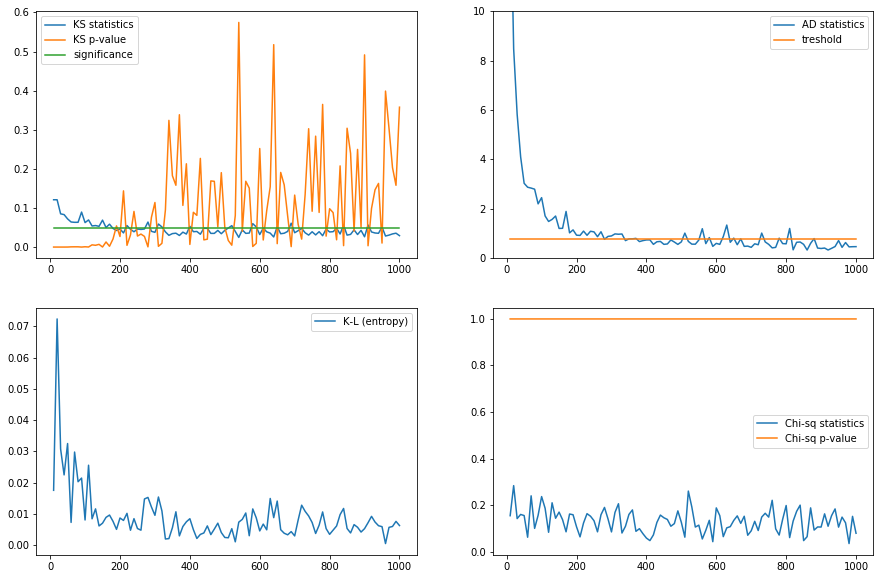

In [10]:
threshold = scipy.stats.anderson(dist_n, 
                                 dist='norm')[1][scipy.stats.anderson(dist_n, 
                                                                      dist='norm')[2]==[5.0]]

fig = pl.figure(figsize = (15,10))
fig.add_subplot(221)
pl.plot(narray, ks_s_b, label='KS statistics')
pl.plot(narray, ks_p_b, label='KS p-value')
pl.plot([narray[0], narray[-1]],[0.05, 0.05], label="significance")
pl.legend()

fig.add_subplot(222)
pl.plot(narray, ad_b,  label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.legend()

fig.add_subplot(223)
pl.plot(narray, kl_b, label='K-L (entropy)')
pl.legend()

fig.add_subplot(224)
pl.plot(narray, csq_s_b, label='Chi-sq statistics')
pl.plot(narray, csq_p_b, label='Chi-sq p-value')
pl.legend();

#### Figure 4. The comparison of the results of each goodness of fit tests for a Binomial distribution with an increasing mean against a Normal distribution.
The first figure shows the KS statistic and the p-value from the KS test. We can see as the mean increases, the p-value also increases and stays pretty much above the significance level of 0.05 when the mean is larger - although it does fluctuate.

The second figure shows the AD statistics as the mean of the distribution increases. We can see here that the AD statistics does decrease as the mean increasese which means that the two distributions seem to be more similar as the mean increases.

The third figure shows the mean of the distribution against KL divergence. It shows that as the mean increases, the KL divergence becomes smaller. Meaning it becomes more similar to a normal distribution as the mean increases.

The last figure shows the results of the chi-square test which shows that the p-value is 1 which is higher than the significance value of 0.05. We can't reject the null hypothesis in this case so it means the Binomial distribution is similar to the Gaussian distribution.


# POISSON

In [11]:
ks_s_p = np.zeros(100)
ks_p_p = np.zeros(100)
ad_p = np.zeros(100)
kl_p = np.zeros(100)
csq_s_p = np.zeros(100)
csq_p_p = np.zeros(100)

In [12]:
np.random.seed(999)

# loop over the different means
for i,n in enumerate(narray):
    
    # generate the distribution
    dist = (np.random.poisson(n, 1000) - n ) / np.sqrt(n)
    
    # run the tests
    ks_s_p[i] = scipy.stats.kstest(dist,'norm')[0]
    ks_p_p[i] = scipy.stats.kstest(dist,'norm')[1]
    
    ad_p[i] = scipy.stats.anderson(dist, dist='norm')[0]
  
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist), max(dist), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])

    kl_p[i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0] / 1000., 
                                    scipy.stats.norm.pdf(bincenters))
    csq_s_p[i] = scipy.stats.chisquare(np.histogram(dist, bins=mybins)[0] / 1000.,
                                       scipy.stats.norm.pdf(bincenters), ddof=1)[0]
    csq_p_p[i] = scipy.stats.chisquare(np.histogram(dist, bins=mybins)[0] / 1000.,
                                       scipy.stats.norm.pdf(bincenters), ddof=1)[1]

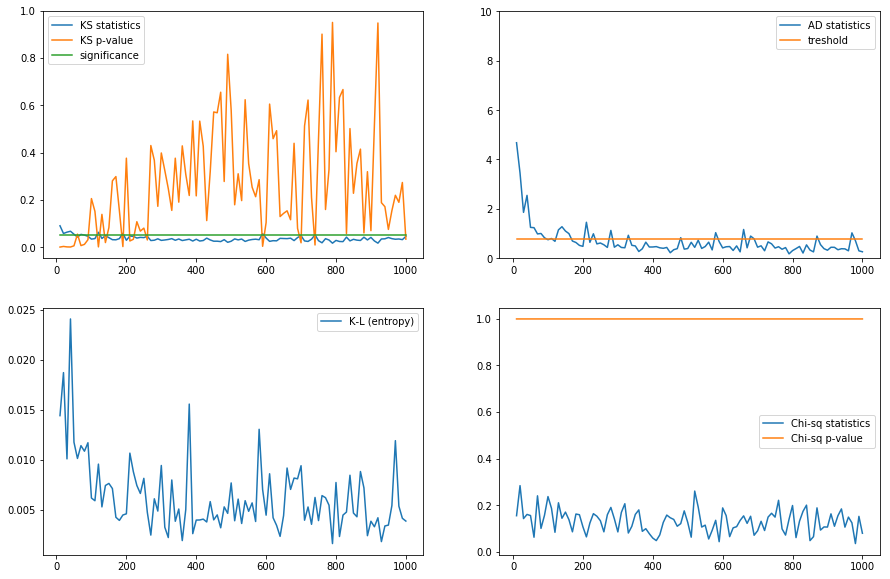

In [13]:
threshold = scipy.stats.anderson(dist_n, 
                                 dist='norm')[1][scipy.stats.anderson(dist_n, 
                                                                      dist='norm')[2]==[5.0]]

fig = pl.figure(figsize = (15,10))
fig.add_subplot(221)
pl.plot(narray, ks_s_p, label='KS statistics')
pl.plot(narray, ks_p_p, label='KS p-value')
pl.plot([narray[0], narray[-1]],[0.05, 0.05], label="significance")
pl.legend()

fig.add_subplot(222)
pl.plot(narray, ad_p,  label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.legend()

fig.add_subplot(223)
pl.plot(narray, kl_p, label='K-L (entropy)')
pl.legend()

fig.add_subplot(224)
pl.plot(narray, csq_s_b, label='Chi-sq statistics')
pl.plot(narray, csq_p_b, label='Chi-sq p-value')
pl.legend();

#### Figure 5. The comparison of the results of each goodness of fit tests for a Poisson distribution with an increasing mean against a Normal distribution.
The first figure shows the KS statistic and the p-value from the KS test. We can see as the mean increases, the p-value also increases and stays pretty much above the significance level of 0.05 when the mean is larger. When comparing this graph to the Binomial distribution, the p-values in this looks higher than the p-values in the Binomial distribution.

The second figure shows the AD statistics as the mean of the distribution increases. We can see here that the AD statistics does decrease as the mean increasese which means that the two distributions seem to be more similar as the mean increases.

The third figure shows the mean of the distribution against KL divergence. It shows that as the mean increases, the KL divergence becomes smaller. Meaning it becomes more similar to a normal distribution as the mean increases. Here we can also see that the KL divergence values are smaller than the values from the binomial distribution one.

The last figure shows the results of the chi-square test which shows that the p-value is 1 which is higher than the significance value of 0.05. We can't reject the null hypothesis in this case so it means the Binomial distribution is similar to the Gaussian distribution.

# NOTE on KL divergence: the KL divergence is a measure of how much approximation you have to do to represent one distribution with the other in terms of information content. You can see what it looks point by point, before you integrate and get a single distance number

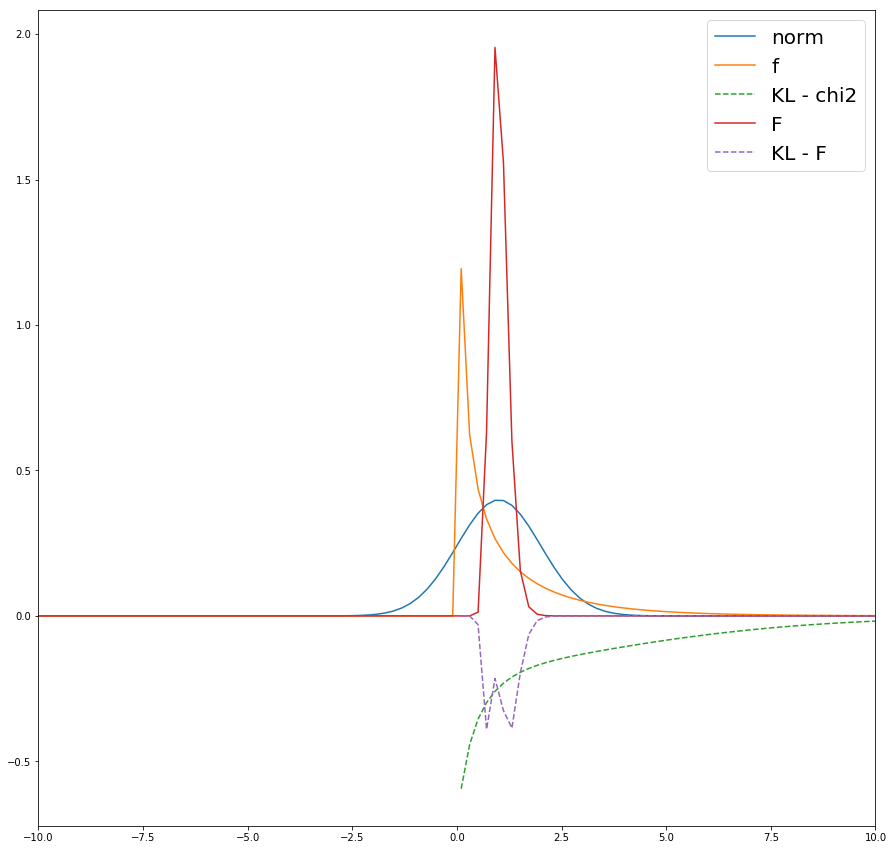

In [14]:
pl.figure(figsize=(15,15))

q = lambda x, mu : scipy.stats.distributions.norm.pdf(x - mu)
c = lambda x, mu : scipy.stats.distributions.chi2.pdf(x, df=mu)
f = lambda x, mu : scipy.stats.distributions.f.pdf(x,100,100)

Dkl = lambda x ,mu, p :  p(x, mu) * np.log10(q(x, mu)) + p(x, mu) * np.log10(p(x, mu))

def model(x) : 
    #gaussian model from scratch
    return 1. / (s * np.sqrt(2 * np.pi)) * np.exp(- ((x - m)**2 / 2. / s**2))

x = np.linspace(-10,10,100)
pl.plot(x, q(x, 1), label='norm')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, p))

pl.plot(x, c(x,1), label='f')
pl.plot(x,Dkl(x, 1, c), '--', label = 'KL - chi2')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, c))

pl.plot(x, f(x,1), label='F')
pl.plot(x, Dkl(x, 1, f), '--', label = 'KL - F')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, f))
bins = np.arange(0, 99, 10)

pl.xlim(-10, 10)
pl.legend(fontsize = 20);